In [1]:
#pip install pysoundfile

In [2]:
#pip install matplotlib

In [3]:
#%matplotlib inline

In [4]:
#conda install -c conda-forge librosa

In [5]:
#$ conda update -n base -c conda-forge conda

In [6]:
#!pip install textblob


In [7]:
import pandas as pad
import numpy as nup
import glob
import soundfile
import os
import sys
import librosa
import librosa.display
import seaborn as sbn 
import matplotlib.pyplot as mplt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Audio
from textblob import TextBlob
import speech_recognition as sr

In [8]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [9]:
os.listdir(path='C:\\Users\\kottu\\Downloads\\speech-emotion-recognition-ravdess-data')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = 'C:\\Users\\kottu\\Downloads\\speech-emotion-recognition-ravdess-data'
listOfFiles = getListOfFiles(dirName)

In [10]:
r=sr.Recognizer()
for file in range(0 ,3):
    print()
    with sr.AudioFile(listOfFiles[file]) as source:   
        print(listOfFiles[file])
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')


C:\Users\kottu\Downloads\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-01-01-01.wav
error

C:\Users\kottu\Downloads\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-01-02-01.wav
error

C:\Users\kottu\Downloads\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-02-01-01.wav
error


In [11]:
RavdessData = 'C:\\Users\\kottu\\Downloads\\speech-emotion-recognition-ravdess-data'

In [12]:
ravdessDirectoryList = os.listdir(RavdessData)
file_emotion = []
file_path = []
for dir in ravdessDirectoryList:
    actor_path = os.path.join(RavdessData, dir)
    if os.path.isdir(actor_path):
        actor_files = os.listdir(actor_path)
        for file in actor_files:
            file_p = os.path.join(actor_path, file)
            if os.path.isfile(file_p):
                part = file.split('.')[0]
                part = part.split('-')
                file_emotion.append(int(part[2]))
                file_path.append(file_p)
emotion_df = pad.DataFrame(file_emotion, columns=['Emotions'])
path_df = pad.DataFrame(file_path, columns=['Path'])
Ravdess_df = pad.concat([emotion_df, path_df], axis=1)
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

In [13]:
dataPath=pad.concat([Ravdess_df], axis=0) 
dataPath.to_csv("data_path.csv", index=False)
dataPath.head()

,Emotions,Path
0,neutral,C:\Users\kottu\Downloads\speech-emotion-recogn...
1,neutral,C:\Users\kottu\Downloads\speech-emotion-recogn...
2,neutral,C:\Users\kottu\Downloads\speech-emotion-recogn...
3,neutral,C:\Users\kottu\Downloads\speech-emotion-recogn...
4,calm,C:\Users\kottu\Downloads\speech-emotion-recogn...


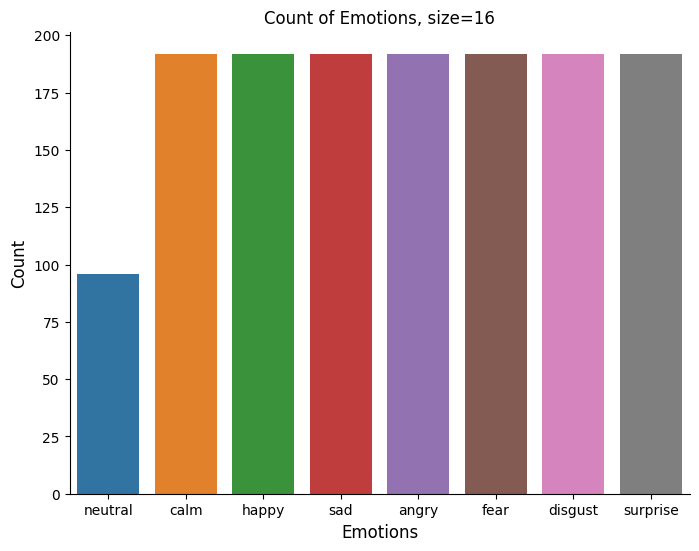

In [14]:
mplt.figure(figsize=(8, 6)) 
mplt.title('Count of Emotions, size=16')
sbn.countplot(data=dataPath,x='Emotions')

mplt.ylabel('Count', size=12)

mplt.xlabel('Emotions', size=12)

sbn.despine(top=True, right=True, left=False, bottom=False)

mplt.show()

In [15]:
def createWaveplot(data, sr, e):
    mplt.figure(figsize=(10, 3)) 
    mplt.title('Waveplot for audio with {} emotion'.format(e), size=15) 
    librosa.display.waveshow(data, sr=sr)
    mplt.show()

In [16]:
def createSpectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    mplt.figure(figsize=(12, 3))
    mplt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    mplt.colorbar()

In [17]:
#pip install --upgrade matplotlib
#!pip install --upgrade librosa matplotlib numpy
import matplotlib.pyplot as plt
import librosa.display

def createWaveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# Rest of your code


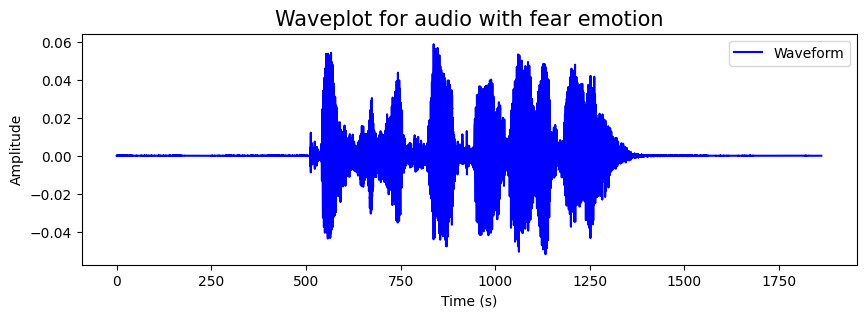

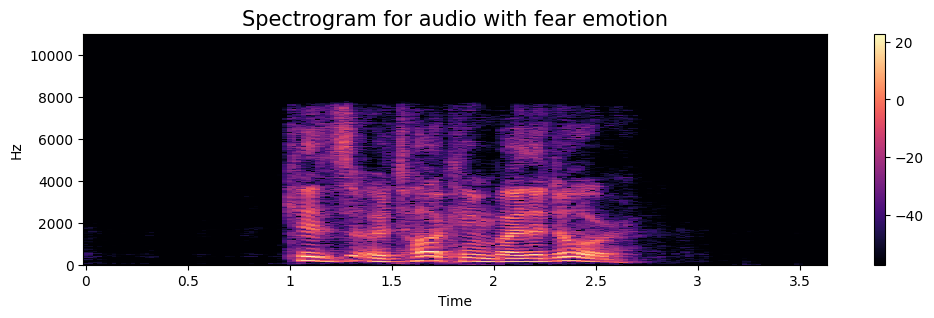

In [18]:
#!pip install --upgrade librosa
#!pip install --upgrade matplotlib
import matplotlib.pyplot as plt
import librosa

def createWaveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    plt.plot(librosa.times_like(data), data, label='Waveform', color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Rest of your code

emotion = 'fear'

path = nup.array(dataPath.Path[dataPath.Emotions == emotion])[1]

data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

In [19]:
#pip install librosa==0.8.1 matplotlib==3.3.2
#!pip install --upgrade matplotlib librosa
#!pip install --upgrade numpy matplotlib librosa
#!pip install --upgrade --user numpy matplotlib librosa


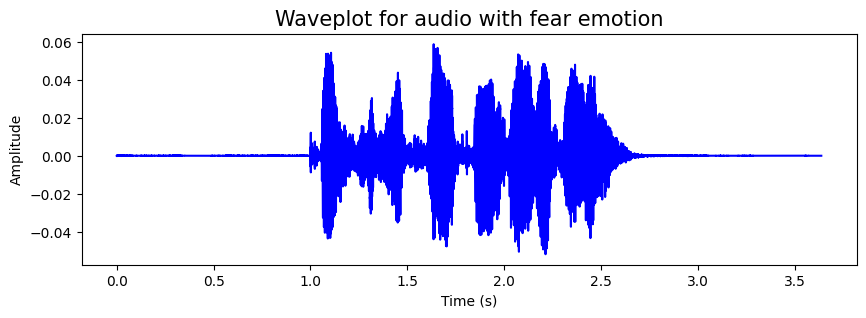

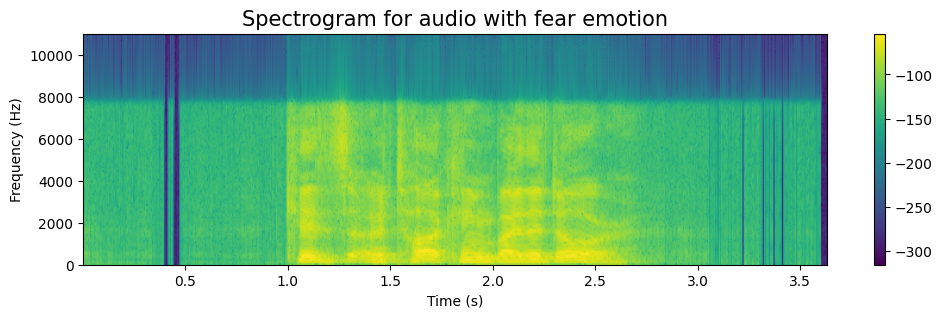

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

def createWaveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    
    time = np.arange(0, len(data)) / sr
    plt.plot(time, data, color='b')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def createSpectrogram(data, sr, emotion):
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
    plt.specgram(data, Fs=sr, cmap='viridis')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()

emotion = 'fear'
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)


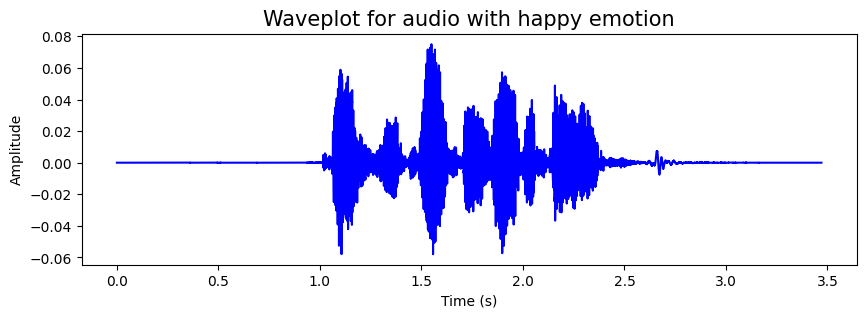

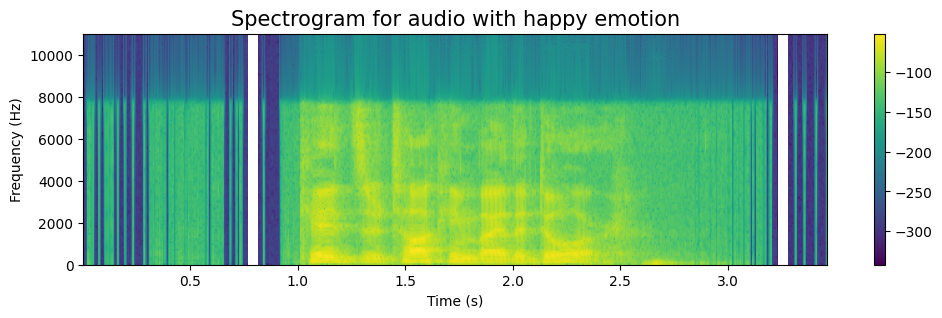

In [21]:
emotion='happy'

path = nup.array(dataPath.Path[dataPath. Emotions==emotion])[1]

data, samplingRate= librosa.load(path)

createWaveplot(data, samplingRate, emotion)

createSpectrogram (data, samplingRate, emotion)

Audio(path)

In [22]:
def noise(data):
    noiseAmp = 0.035*nup.random. uniform()*nup.amax(data) 
    data = data + noiseAmp*nup.random.normal(size=data.shape[0]) 
    return data

def stretch (data, rate=0.8):
    return librosa.effects.time_stretch (data, rate)

def shift(data):

    shiftRange = int(nup.random.uniform (low=-5, high= 5) *1000)
    return nup.roll (data, shiftRange)


def pitch (data, samplingRate, pitchFactor=0.7): 
    return librosa.effects. pitch_shift(data, samplingRate, pitchFactor)

In [23]:
path = nup.array(dataPath.Path)[1]

data,sampleRate= librosa.load(path)

In [24]:
# x = noise (data)

# mplt.figure(figsize=(14,4))

# librosa.display.waveplot (y=x, sr=sampleRate) 
# Audio(x, rate=sampleRate)

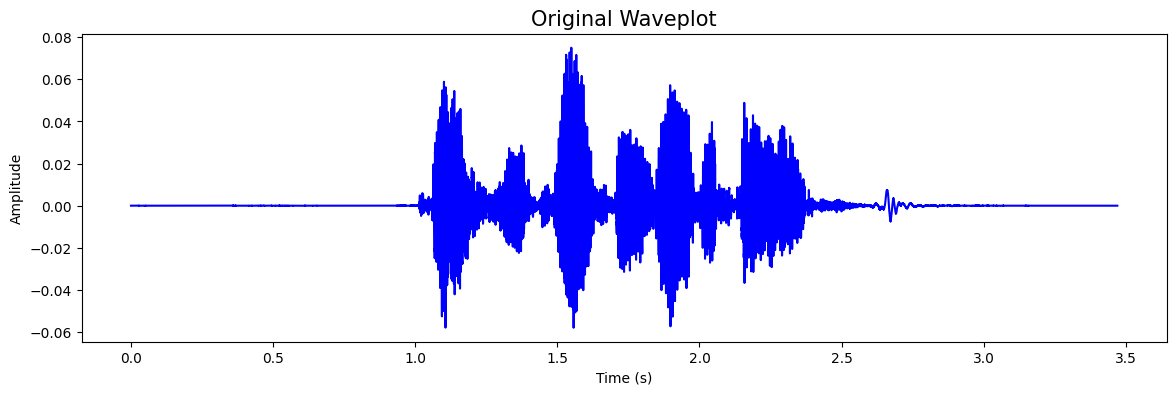

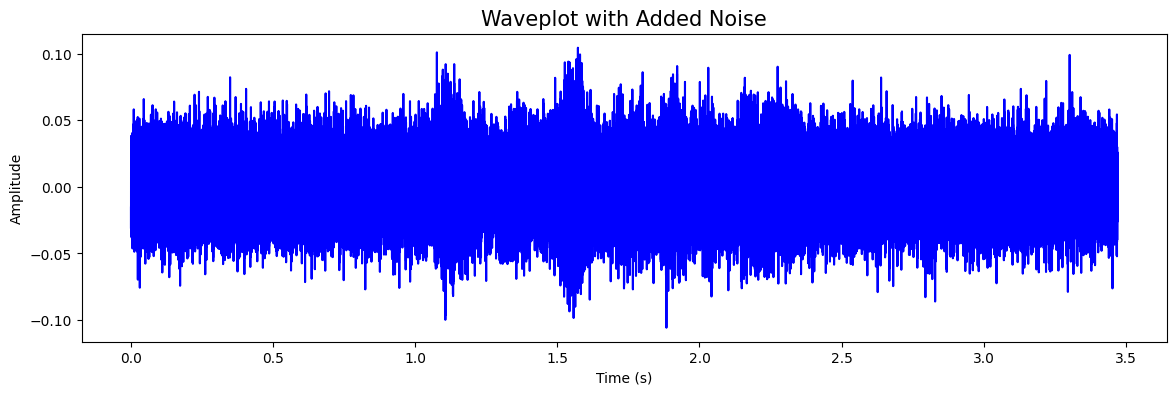

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

# Function to create a waveplot
def createWaveplot(data, sr, title):
    plt.figure(figsize=(14, 4))
    plt.title(title, size=15)
    time = np.arange(0, len(data)) / sr
    plt.plot(time, data, color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Load the audio file
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
data, sampleRate = librosa.load(path)

# Create waveplot for the original audio
createWaveplot(data, sampleRate, 'Original Waveplot')

# Add noise to the audio
noise_factor = 0.02
noise = np.random.normal(0, noise_factor, len(data))
data_with_noise = data + noise

# Create waveplot for the audio with added noise
createWaveplot(data_with_noise, sampleRate, 'Waveplot with Added Noise')


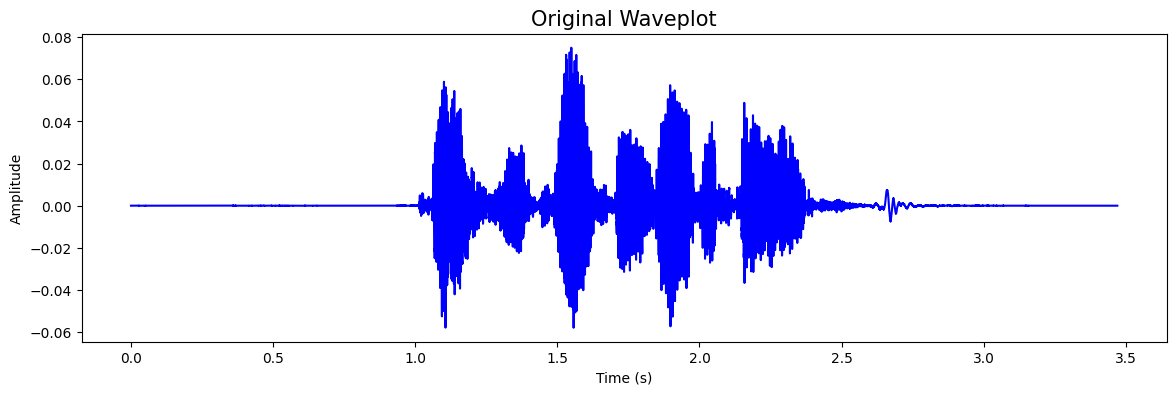

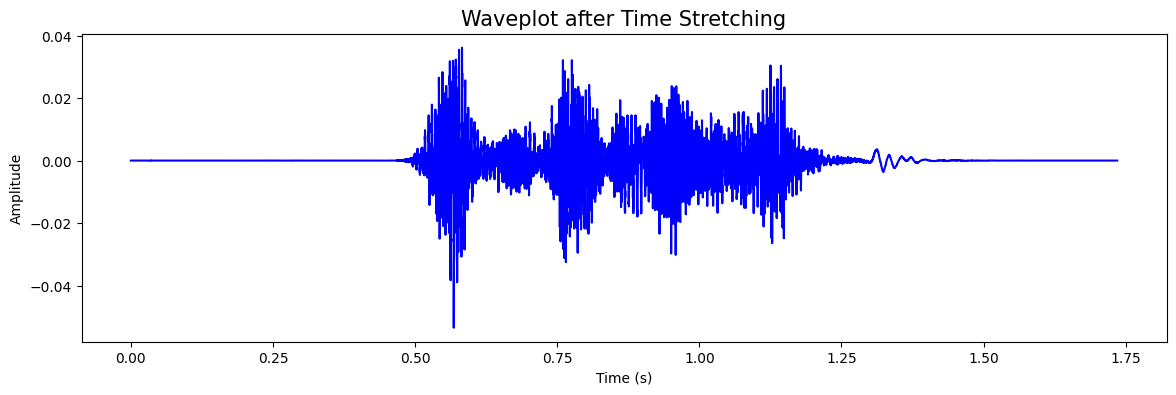

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

def createWaveplot(data, sr, title):
    plt.figure(figsize=(14, 4))
    plt.title(title, size=15)
    time = np.arange(0, len(data)) / sr
    plt.plot(time, data, color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Load the audio file
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
data, sampleRate = librosa.load(path)

# Create waveplot for the original audio
createWaveplot(data, sampleRate, 'Original Waveplot')

# Stretch the audio
x = librosa.effects.time_stretch(data, rate=2.0)

# Create waveplot for the stretched audio
createWaveplot(x, sampleRate, 'Waveplot after Time Stretching')

# Play the stretched audio
Audio(x, rate=sampleRate)


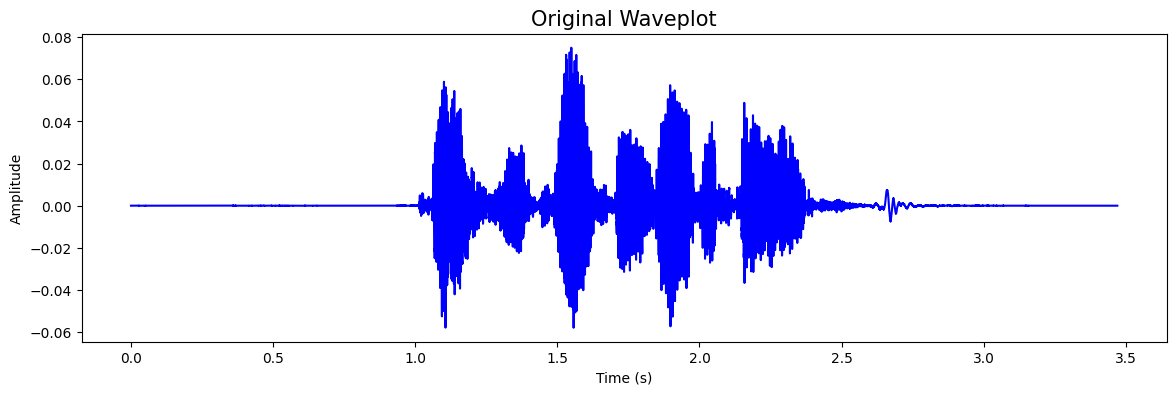

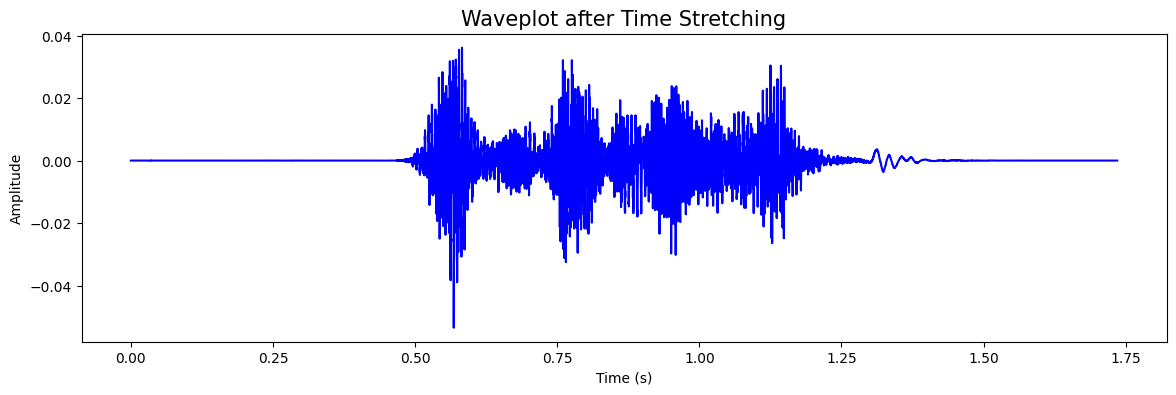

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

def createWaveplot(data, sr, title):
    plt.figure(figsize=(14, 4))
    plt.title(title, size=15)
    time = np.arange(0, len(data)) / sr
    plt.plot(time, data, color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Load the audio file
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
data, sampleRate = librosa.load(path)

# Create waveplot for the original audio
createWaveplot(data, sampleRate, 'Original Waveplot')

# Stretch the audio
x = librosa.effects.time_stretch(data, rate=2.0)

# Create waveplot for the stretched audio
createWaveplot(x, sampleRate, 'Waveplot after Time Stretching')

# Play the stretched audio
Audio(x, rate=sampleRate)


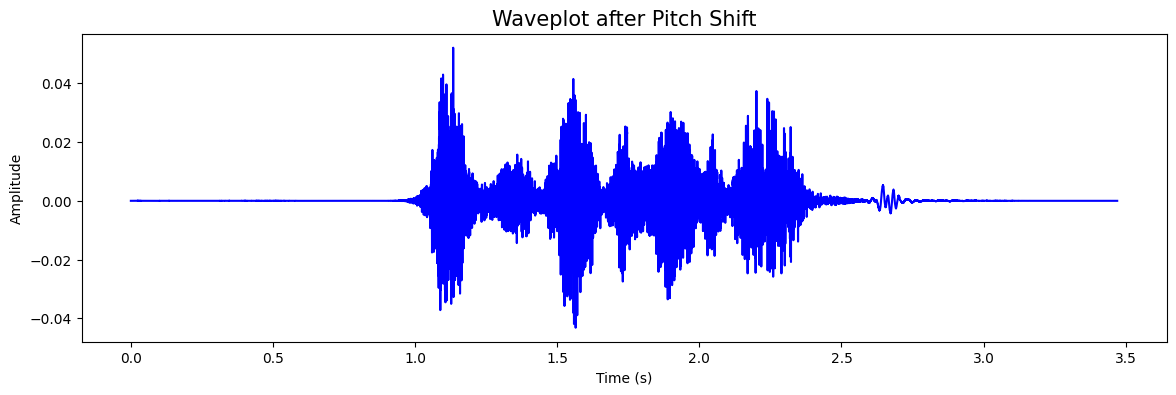

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

def createWaveplot(data, sr, title):
    plt.figure(figsize=(14, 4))
    plt.title(title, size=15)
    time = np.arange(0, len(data)) / sr
    plt.plot(time, data, color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Assuming 'data' and 'sampleRate' are defined elsewhere in your code

# Pitch shift the audio
pitch_factor = 0.7
x = librosa.effects.pitch_shift(data, sr=sampleRate, n_steps=pitch_factor)

# Create waveplot for the pitch-shifted audio
createWaveplot(x, sampleRate, 'Waveplot after Pitch Shift')

# Play the pitch-shifted audio
Audio(x, rate=sampleRate)


In [29]:
def extractFeature(fileName, mfcc, chroma, mel):
    with soundfile.SoundFile(fileName) as soundFile:
        X = soundFile.read(dtype="float32")
        sampleRate = soundFile.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sampleRate, n_mfcc=48).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampleRate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sampleRate).T, axis=0)
            result = np.hstack((result, mel))
    return result

In [30]:
emotions={

'01': 'neutral',

'02':'calm',

'03':'happy',

'04':'sad',

'05':'angry',

'06':'fearful',

'07':'disgust',

'08':'surprised'
}
observedEmotions=['calm', 'happy', 'disgust']

In [31]:
def loadData(test_size=0.2):
    x, y = [], []
    for file in glob.glob("C:\\Users\\kottu\\Downloads\\speech-emotion-recognition-ravdess-data\\**\\*"):
        fileName = os.path.basename(file)
        split_filename = fileName.split("-")
        
        # Check if there are enough elements after the split
        if len(split_filename) < 3:
            print(f"Skipping file {fileName} due to insufficient elements in filename")
            continue
        
        emotion_key = split_filename[2]
        
        try:
            emotion1 = emotions[emotion_key]
        except KeyError:
            print(f"Skipping file {fileName} due to unknown emotion key: {emotion_key}")
            continue
        
        print(f"File: {fileName}, Emotion: {emotion1}")
        
        if emotion1 not in observedEmotions:
            print(f"Skipping file {fileName} due to emotion {emotion1}")
            continue
        
        feature = extractFeature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion1)
    
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)


In [32]:
xTrain, xTest, yTrain, yTest = loadData(test_size=0.23)

File: 03-01-01-01-01-01-01.wav, Emotion: neutral
Skipping file 03-01-01-01-01-01-01.wav due to emotion neutral
File: 03-01-01-01-01-02-01.wav, Emotion: neutral
Skipping file 03-01-01-01-01-02-01.wav due to emotion neutral
File: 03-01-01-01-02-01-01.wav, Emotion: neutral
Skipping file 03-01-01-01-02-01-01.wav due to emotion neutral
File: 03-01-01-01-02-02-01.wav, Emotion: neutral
Skipping file 03-01-01-01-02-02-01.wav due to emotion neutral
File: 03-01-02-01-01-01-01.wav, Emotion: calm
File: 03-01-02-01-01-02-01.wav, Emotion: calm
File: 03-01-02-01-02-01-01.wav, Emotion: calm
File: 03-01-02-01-02-02-01.wav, Emotion: calm
File: 03-01-02-02-01-01-01.wav, Emotion: calm
File: 03-01-02-02-01-02-01.wav, Emotion: calm
File: 03-01-02-02-02-01-01.wav, Emotion: calm
File: 03-01-02-02-02-02-01.wav, Emotion: calm
File: 03-01-03-01-01-01-01.wav, Emotion: happy
File: 03-01-03-01-01-02-01.wav, Emotion: happy
File: 03-01-03-01-02-01-01.wav, Emotion: happy
File: 03-01-03-01-02-02-01.wav, Emotion: happy


In [33]:
print((xTrain.shape[0], xTest.shape[0]))

(443, 133)


In [34]:
print(f'Features extracted: {xTrain.shape[1]}')

Features extracted: 188


In [35]:
#Initialize the Multiplayer-Perceptron Classifier
model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive',max_iter=500)
#model=MLPClassifier()

In [36]:
#Training the model
model.fit(xTrain,yTrain)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [37]:
#Predicting for the test set
expected_Of_y = yTest
yPred=model.predict(xTest)

In [38]:
print(metrics.confusion_matrix(expected_Of_y, yPred))

[[36  3  2]
 [ 3 40  9]
 [ 2  3 35]]


In [39]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

        calm       0.88      0.88      0.88        41
     disgust       0.87      0.77      0.82        52
       happy       0.76      0.88      0.81        40

    accuracy                           0.83       133
   macro avg       0.84      0.84      0.84       133
weighted avg       0.84      0.83      0.83       133



In [40]:
accuracy=accuracy_score(y_true=yTest, y_pred=yPred)
print("Accuracy: {:2f}%".format(accuracy*100))

Accuracy: 83.458647%


In [41]:
# r=sr.Recognizer()
# with sr.AudioFile('C:\\Users\\kottu\\Downloads\\speech-emotion-recognition-ravdess-data\\Actor_01\\03-01-01-01-01-02-01.wav') as source:
#         audio = r.listen(source)
#         print(audio)
#         try:
#             text = r.recognize_google(audio)
#             print(text)
#         except:
#             print('error')

In [42]:
import speech_recognition as sr
from textblob import TextBlob
import numpy as np

# Initialize recognizer
r = sr.Recognizer()

# Path to your audio file
file_path = r'D:\project\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-01-02-01.wav'

# Initialize text variable
text = ""

try:
    with sr.AudioFile(file_path) as source:
        audio = r.listen(source)
        text = r.recognize_google(audio)
        print("Recognized text:", text)

        # Perform sentiment analysis
        blob = TextBlob(text)
        sentiment = blob.sentiment.polarity
        print("Sentiment polarity:", sentiment)

        # Interpret sentiment
        if sentiment == 0:
            print("Neutral")
        elif sentiment == 1:
            print("Happy")
        elif sentiment <= 0.3 and sentiment >= 0.1:
            print("Calm")
        elif sentiment <= -0.5 and sentiment >= -1:
            print("Sad")
        elif sentiment >= -1 and sentiment <= -0.7:
            print("Angry")
        elif sentiment <= -0.3 and sentiment >= -0.7:
            print("Fearful")
        elif sentiment <= -0.7 and sentiment >= -1:
            print("Disgust")
        elif np.round(sentiment) == 0:
            print("Surprised")

except FileNotFoundError:
    print(f" ")
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print(f"Could not request results from Google Speech Recognition service; {e}")


In [43]:
print("text:",text)
blob = TextBlob(text)
sentiment = blob.sentiment.polarity
print(sentiment)
if sentiment == 0:
    print("Neutral")
elif sentiment == 1:
    print("happy")
elif sentiment <=0.3 and sentiment >=0.1:
    print("calm")
elif sentiment <= -0.5 and sentiment >= -1:
    print("sad")
elif sentiment >= -1 and sentiment <=-0.7:
    print("angry")
elif sentiment <= -0.3 and sentiment >=-0.7:
    print("fearful")
elif sentiment <= -0.7 and sentiment >=-1:
    print("disgust")
elif np.round(sentiment)==0 :
    print("surprised")

text: 
0.0
Neutral
